In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cf
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import pandas as pd
import pymannkendall as mk
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=xr.open_dataset('adaptor.mars.internal-1667995637.1039069-1528-14-fbf551d2-044b-4ff7-8667-20a881821386.nc')

In [3]:
data

<xarray.Dataset>
Dimensions:    (longitude: 137, latitude: 101, time: 11808)
Coordinates:
  * longitude  (longitude) float32 -17.0 -16.75 -16.5 -16.25 ... 16.5 16.75 17.0
  * latitude   (latitude) float32 25.0 24.75 24.5 24.25 ... 0.75 0.5 0.25 0.0
  * time       (time) datetime64[ns] 1981-01-01 ... 2021-12-01T23:00:00
Data variables:
    t2m        (time, latitude, longitude) float32 ...
    sst        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-11-09 12:09:14 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [4]:
# converting inland air and sea surface temperatures to degrees celcius

sst_data=data.sst-273.15
temp_data=data.t2m-273.15

In [5]:
# Slicing location

sst_slice=sst_data.sel(longitude=slice(-3.3,1.2),latitude=slice(6.2,0))
temp_slice=temp_data.sel(longitude=slice(-3.3,1.2),latitude=slice(6.2,4.5))

In [19]:
#Sea Surface Temperature not needed for now
Accra_sea=sst_data.sel(longitude=-0.205874,latitude=5.614818, method='nearest')
Axim_sea=sst_data.sel(longitude=-2.24181,latitude=4.86641, method='nearest')
Sekondi_Tokardi_sea=sst_data.sel(longitude=-1.75773,latitude=4.92678, method='nearest')
Tema_sea=sst_data.sel(longitude=0.000000,latitude=5.666667, method='nearest')

In [20]:
#Inland Air Temperature
Accra_air=temp_data.sel(longitude=-0.205874,latitude=5.614818, method='nearest')
Axim_air=temp_data.sel(longitude=-2.24181,latitude=4.86641, method='nearest')
Sekondi_Tokardi_air=temp_data.sel(longitude=-1.75773,latitude=4.92678, method='nearest')
Tema_air=temp_data.sel(longitude=0.000000,latitude=5.666667, method='nearest')

In [21]:
#Mean of Sea and Air Surface Temperature 
#Accra_ysst=sst_slice.groupby('time.year').mean(dim='time')
Accra_yair=Accra_air.groupby('time.year').mean(dim='time')

#Axim_ysst=sst_slice.groupby('time.year').mean(dim='time')
Axim_yair=Axim_air.groupby('time.year').mean(dim='time')

#Sekondi_Tokardi_ysst=sst_slice.groupby('time.year').mean(dim='time')
Sekondi_Tokardi_yair=Sekondi_Tokardi_air.groupby('time.year').mean(dim='time')

#Tema_ysst=sst_slice.groupby('time.year').mean(dim='time')
Tema_yair=Tema_air.groupby('time.year').mean(dim='time')

In [25]:
Accra_yair

<xarray.DataArray 't2m' (year: 41)>
array([25.940434, 25.7555  , 25.775337, 26.054312, 25.902514, 25.85161 ,
       26.51263 , 26.20956 , 25.893883, 25.861567, 26.103407, 25.785883,
       26.10725 , 25.950768, 26.274387, 26.021666, 25.901371, 26.4022  ,
       26.033054, 25.937946, 26.007387, 26.136051, 26.36973 , 26.16551 ,
       26.25547 , 26.458008, 26.255493, 26.317474, 26.16979 , 26.669325,
       26.266825, 26.0877  , 26.129204, 26.148077, 26.218336, 26.392067,
       26.29861 , 26.28815 , 26.594599, 26.428242, 26.695763],
      dtype=float32)
Coordinates:
    longitude  float32 -0.25
    latitude   float32 5.5
  * year       (year) int64 1981 1982 1983 1984 1985 ... 2018 2019 2020 2021

In [22]:
#Monthly Sea Surface Temperature
sst_month=sst_slice.groupby('time.month').mean(dim='time')
sst_mmean=sst_month.mean(dim=('longitude','latitude'))

#Monthly Surface Air Temperature not needed
# temp_month=temp_slice.groupby('time.month').mean(dim='time')
# temp_mmean=temp_month.mean(dim=('longitude','latitude'))

In [23]:
#Yearly Sea Surface Temperature
sst_year=sst_slice.groupby('time.year').mean(dim='time')
sst_ymean=sst_year.mean(dim=('longitude','latitude'))

#Yearly Air Temperature not needed for now
# temp_year=temp_slice.groupby('time.year').mean(dim='time')
# temp_ymean=temp_year.mean(dim=('longitude','latitude'))

In [24]:
sst_year

<xarray.DataArray 'sst' (year: 41, latitude: 25, longitude: 18)>
array([[[      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ..., 26.916725, 27.104862,
         27.221317],
        [      nan,       nan,       nan, ..., 27.038498, 27.200523,
         27.342606],
        ...,
        [26.987213, 26.99937 , 27.010828, ..., 26.948948, 27.015432,
         27.113241],
        [26.792812, 26.788935, 26.7985  , ..., 26.854923, 26.91558 ,
         27.001764],
        [26.596476, 26.591644, 26.589111, ..., 26.804049, 26.826197,
         26.910126]],

       [[      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ..., 26.54663 , 26.718264,
         26.931358],
        [      nan,       nan,       nan, ..., 26.678719, 26.829576,
         26.98513 ],
...
        [27.422987, 27.438585, 27.446293, ..., 27.691694, 27.708015,
         27.718458],
        [27.182064, 27.202938, 27.214827, ..., 27.514536, 27.53424 ,
         27.549181],
        [26.932352, 26.953299, 26.971048, ..., 27.323618, 27.351023,
         27.366316]],

       [[      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ..., 27.749687, 27.85915 ,
         27.902407],
        [      nan,       nan,       nan, ..., 27.735128, 27.886229,
         28.005709],
        ...,
        [27.92203 , 27.925764, 27.911709, ..., 27.992805, 28.010817,
         28.02059 ],
        [27.782999, 27.787004, 27.777016, ..., 27.862068, 27.881392,
         27.894835],
        [27.620653, 27.624573, 27.624031, ..., 27.71794 , 27.738731,
         27.752663]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -3.25 -3.0 -2.75 -2.5 ... 0.25 0.5 0.75 1.0
  * latitude   (latitude) float32 6.0 5.75 5.5 5.25 5.0 ... 0.75 0.5 0.25 0.0
  * year       (year) int64 1981 1982 1983 1984 1985 ... 2018 2019 2020 2021

In [12]:
z1[0]

NameError: name 'z1' is not defined

In [45]:
z2[0]

0.8795052276168916

In [46]:
z3[0]

0.8758589521241733

In [47]:
z4[0]

0.969423297667208

# scatter plot

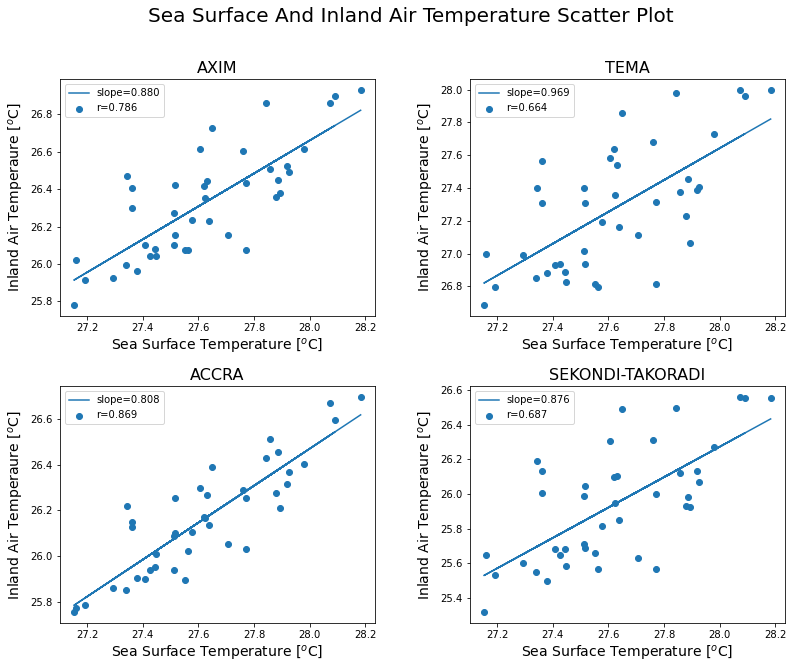

In [50]:
fig, ax = plt.subplots(2, 2, figsize=(13, 10))#, sharex=True, sharey=True)
plt.subplots_adjust(hspace=0.3, wspace=0.3)

fig.suptitle('Sea Surface And Inland Air Temperature Scatter Plot', fontsize=20)

z1 = np.polyfit(sst_ymean, Accra_yair, 1)
p = np.poly1d(z1)
ax[1, 0].plot(sst_ymean, p(sst_ymean))
ax[1, 0].scatter(sst_ymean, Accra_yair)
ax[1, 0].set_xlabel('Sea Surface Temperature [$^o$C]', fontsize=14)
ax[1, 0].set_ylabel('Inland Air Temperaure [$^o$C]', fontsize=14)
ax[1, 0].set_title('ACCRA', fontsize=16)
ax[1, 0].legend(('slope=0.808','r=0.869'))

z2 = np.polyfit(sst_ymean, Axim_yair, 1)
p = np.poly1d(z2)
ax[0, 0].plot(sst_ymean, p(sst_ymean))
ax[0, 0].scatter(sst_ymean, Axim_yair)
ax[0, 0].set_xlabel('Sea Surface Temperature [$^o$C]', fontsize=14)
ax[0, 0].set_ylabel('Inland Air Temperaure [$^o$C]', fontsize=14)
ax[0, 0].set_title('AXIM', fontsize=16)
ax[0, 0].legend(('slope=0.880','r=0.786'))

z3 = np.polyfit(sst_ymean, Sekondi_Tokardi_yair, 1)
p = np.poly1d(z3)
ax[1, 1].plot(sst_ymean, p(sst_ymean))
ax[1, 1].scatter(sst_ymean, Sekondi_Tokardi_yair)
ax[1, 1].set_xlabel('Sea Surface Temperature [$^o$C]', fontsize=14)
ax[1, 1].set_ylabel('Inland Air Temperaure [$^o$C]', fontsize=14)
ax[1, 1].set_title('SEKONDI-TAKORADI', fontsize=16)
ax[1, 1].legend(('slope=0.876','r=0.687'))

z4 = np.polyfit(sst_ymean, Tema_yair, 1)
p = np.poly1d(z4)
ax[0, 1].plot(sst_ymean, p(sst_ymean))
ax[0, 1].scatter(sst_ymean, Tema_yair)
ax[0, 1].set_xlabel('Sea Surface Temperature [$^o$C]', fontsize=14)
ax[0, 1].set_ylabel('Inland Air Temperaure [$^o$C]', fontsize=14)
ax[0, 1].set_title('TEMA', fontsize=16)
ax[0, 1].legend(('slope=0.969','r=0.664'))

fig.savefig('Cities.jpeg')

In [29]:
#Converting to DataFrame
sea_temp=sst_mmean.to_dataframe(name=None, dim_order=None)
sea_tempy=sst_ymean.to_dataframe(name=None, dim_order=None)
#air_temp=temp_mmean.to_dataframe(name=None, dim_order=None) not needed

In [31]:
sea_tempn=np.array(sea_temp.sst)
sea_tempyy=np.array(sea_tempy.sst)
#air_tempn=np.array(air_temp.t2m) not needed

In [167]:
mk.original_test(sst_mmean)

Mann_Kendall_Test(trend='no trend', h=False, p=0.24372228477217428, z=-1.1657333182503609, Tau=-0.2727272727272727, s=-18.0, var_s=212.66666666666666, slope=-0.1556200451321072, intercept=28.875899261898464)

In [32]:
#print(df.corr())
corr_Accra = np.corrcoef(sst_ymean, Accra_yair)[0,1]
corr_Axim = np.corrcoef(sst_ymean, Axim_yair)[0,1]
corr_Sek = np.corrcoef(sst_ymean, Sekondi_Tokardi_yair)[0,1]
corr_Tema = np.corrcoef(sst_ymean, Tema_yair)[0,1]

In [33]:
corr_Accra

0.8692273230386282

In [34]:
corr_Axim

0.7854624477478106

In [35]:
corr_Sek

0.6867085819026018

In [36]:
corr_Tema

0.6644131562231356

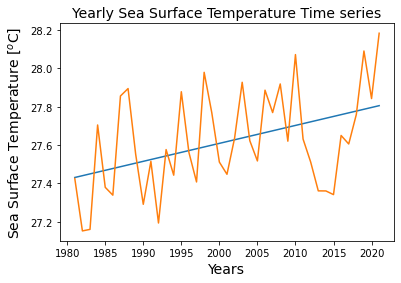

In [37]:
#X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
X=np.arange(1981,2022)
z = np.polyfit(X, sea_tempyy, 1)
p = np.poly1d(z)
plt.plot(X, p(X))
plt.xlabel('Years', fontsize=14)
plt.ylabel('Sea Surface Temperature [$^o$C]', fontsize=14)
plt.plot(X, sea_tempyy, label='time')
plt.title('Yearly Sea Surface Temperature Time series', fontsize=14)
plt.savefig('Years.jpeg')

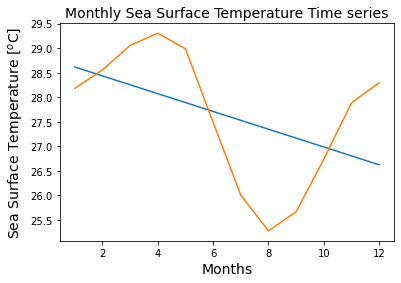

In [38]:
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
z = np.polyfit(X, sea_tempn, 1)
p = np.poly1d(z)
plt.plot(X, p(X))
plt.xlabel('Months', fontsize=14)
plt.ylabel('Sea Surface Temperature [$^o$C]', fontsize=14)
plt.plot(X, sea_tempn)
plt.title('Monthly Sea Surface Temperature Time series', fontsize=14)
plt.savefig('Months.jpeg')